---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [97]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pandas = pd
from sklearn.model_selection import train_test_split
import seaborn

### Loading the data

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In [98]:
!head -n 6 fruit_data_with_colors.txt

In [99]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [100]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Create a mapping from fruit label value to fruit name to make results easier to interpret.

In [101]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Examining the data

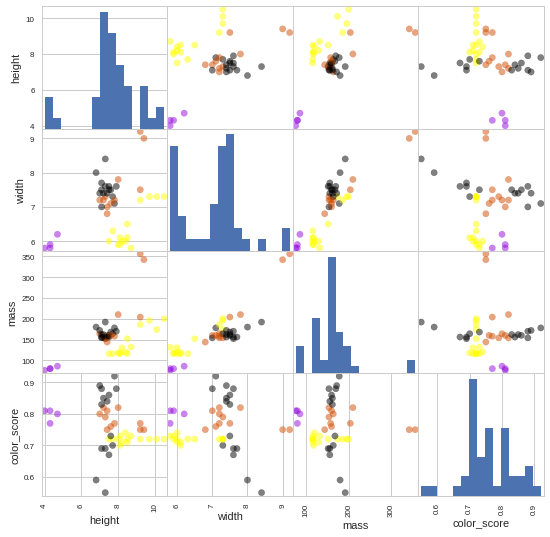

In [102]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

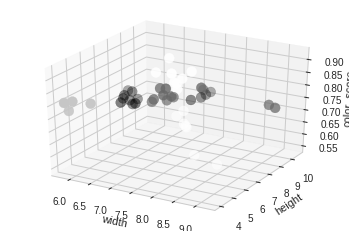

In [103]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

For this example, we use the mass, width, and height features of each fruit instance

In [104]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [106]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [107]:
knn.score(X_test, y_test)

0.53333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

#### first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm

In [108]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
print(fruit_prediction)
print(lookup_fruit_name[fruit_prediction[0]])

[2]
mandarin


#### second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm

In [109]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [110]:
seaborn.set_style("whitegrid")

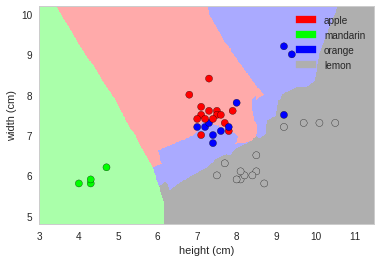

In [111]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

Based on this, it looks like the classifier will do well with /mandarin/ and /lemon/, but might confuse:

 * a narrow /orange/ for a /lemon/
 * a narrower and shorter /orange/ for an /apple/
 * a narrower /apple/ for an /orange/

Which, given that we are leaving out texture, color, stems, and other more descritive attributes, seems reasonable. The world might be better off calling oranges wide-lemons, anyway, one less fruit name to learn. But then apples would be tall-wide-ish lemons... As with most things in life, it's just best to stick with the mandarins.

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

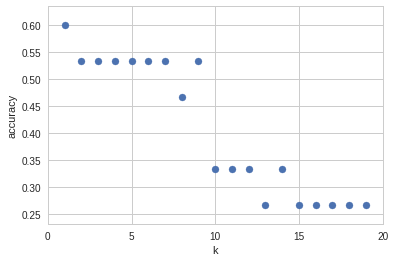

In [112]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [113]:
print(fruits.shape)
print(0.75 * fruits.shape[0])

(59, 7)
44.25


So, as the number of neighbors goes up, the accuracy of the models goes down. Although a K of 1 should overfit the data, since we only have 44 points in the training set, the higher values are likely too generalized.

### How sensitive is k-NN classification accuracy to the train/test split proportion?

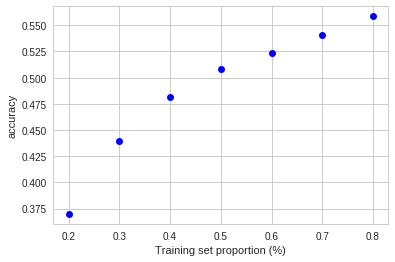

In [114]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()
mean_scores = []
for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    mean = np.mean(scores)
    plt.plot(s, mean, 'bo')
    mean_scores.append(mean)
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [115]:
frame = pandas.DataFrame.from_dict({"Proportion": t, "Accuracy": mean_scores})

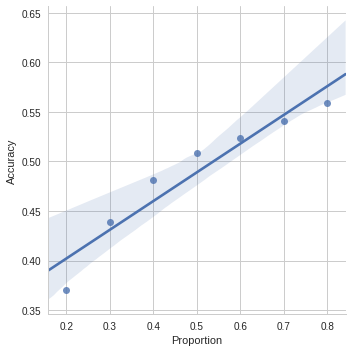

In [116]:
grid = seaborn.lmplot(x="Proportion", y="Accuracy", data=frame)

As you might expect, as you increase the amount of training data, the accuracy of the model improves.